# Movie & Book Reviews Project

Author: Noah Jett

Date: 12/05/2019

Made as part of Data Science 377 at Illinois Wesleyan University

I am interested in why some books are made into movies and some are not. I think there might be something measurably different about books that are made into movies and those which are not. To answer this I found two datasets 'Goodreads-books' and 'TMDB 5000 Movie Dataset'. 


### Dataset 1: Goodreads-books from Kaggle
Goodreads-books is data pulled from popular book review and reccomendation site Goodreads. Each entry in this dataset is a unique book, and contains information like author, pages, average rating, and number of reviews. The data was scraped from the site directly using the publically available Goodreads API.

Can be found here:
https://www.kaggle.com/jealousleopard/goodreadsbooks



### Dataset 2: TMDB 5000 Movie Dataset from Kaggle
Data on 5000 movies scraped from The Movie Database (TMDB).

Can be found here:
https://www.kaggle.com/tmdb/tmdb-movie-metadata#tmdb_5000_credits.csv



### Goal

The goal of this project is to do exploratory analyses on these datasets, combine them, and look at entries occurring in both datasets, i.e. books which have a movie adaptation. 



### Research Questions: 
1. Is the mean rating of books made into a movie significantly different than those that are not?
2. Is the mean rating of movies based on a book significantly different than those that are not?
3. Can we make a model to predict what rating a book would get if it were turned into a movie?
4. Can we make a model to predict whether a book will be made into a movie?

An important note is that merging the two datasets is itself an important goal of the project. Combining datasets can create value by allowing future data scientists to look at data in different ways, and ask different questions.


### Ethics Statement

This project uses two publically available datasets, which can be found here https://www.kaggle.com/jealousleopard/goodreadsbooks, and here https://www.kaggle.com/tmdb/tmdb-movie-metadata#tmdb_5000_credits.csv.

These datasets were created through publically available APIs, and are some of the highest rated sets on the popular data science site Kaggle. They do not contain any private information on persons or compaines. The movie dataset contains information about movie budgets and revenues, both of which are publically available information. 

The result of this project, to combine the datasets and identify relationships between them, should not have any negative impact on specific works or their creators. The subjects of the datasets can realistically only gain from the information created from this project.

### Imports and setup

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_colwidth',1000)

In [ ]:
!pip install fuzzywuzzy
!pip install python-Levenshtein

In [ ]:
import fuzzywuzzy
from fuzzywuzzy import process 

Import Method: From Google Drive

In [4]:
"""
from google.colab import drive
drive.mount('/content/drive/')
"""

"\nfrom google.colab import drive\ndrive.mount('/content/drive/')\n"

In [5]:
bookpath = 'https://raw.githubusercontent.com/noahjett/Movie-Goodreads-Analysis/master/books.csv'
moviepath = 'https://raw.githubusercontent.com/noahjett/Movie-Goodreads-Analysis/master/tmdb_5000_movies.csv'
creditpath = 'https://raw.githubusercontent.com/noahjett/Movie-Goodreads-Analysis/master/tmdb_5000_credits.csv'

if not os.path.exists("/content/books.csv"):
  books = pd.read_csv(bookpath, error_bad_lines=False)

if not os.path.exists('/content/tmdb_5000_movies.csv'):
  movies = pd.read_csv(moviepath, error_bad_lines=False)

if not os.path.exists('/content/tmdb_5000_credits.csv'):
  credits = pd.read_csv(creditpath, error_bad_lines=False)


In [6]:


"""
path1 = "/content/drive/My Drive/data/books.csv"
books = pd.read_csv(path1, error_bad_lines=False)

path2 = "/content/drive/My Drive/data/tmdb_5000_movies.csv"
movies = pd.read_csv(path2, error_bad_lines=False)

path3 = "/content/drive/My Drive/data/tmdb_5000_credits.csv"
credits = pd.read_csv(path3, error_bad_lines=False)

#path4 = "/content/drive/My Drive/data/Dataframe.csv"
#df = pd.read_csv(path4, error_bad_lines=False)
"""

'\npath1 = "/content/drive/My Drive/data/books.csv"\nbooks = pd.read_csv(path1, error_bad_lines=False)\n\npath2 = "/content/drive/My Drive/data/tmdb_5000_movies.csv"\nmovies = pd.read_csv(path2, error_bad_lines=False)\n\npath3 = "/content/drive/My Drive/data/tmdb_5000_credits.csv"\ncredits = pd.read_csv(path3, error_bad_lines=False)\n\n#path4 = "/content/drive/My Drive/data/Dataframe.csv"\n#df = pd.read_csv(path4, error_bad_lines=False)\n'

### Missing values 

In [ ]:
books.isna().sum()


Goodreads dataset has no missing values

In [6]:
movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

We see that the 'homepage' and 'tagline' fields are empty for many entries, but these are values we are not concerned with. 

There are also a few (<=3) for other fields, but since they are so few these can likely be dropped with no effect.

### Goodreads Relevant Columns/Variables



*   **title** - The name of the book
*   **authors** - The writer of the book
*   **average_rating** - From 1-5, the average rating given by reviewers
*   **language_code** - A shorthand for the language used
*   **# num_pages** - The number of pages in the book
*   **ratings_count** - The total number of reviews for the book




### Goodreads descriptives

In [ ]:
books.head(5)

### Dropping unused columns

In [ ]:
books = books.drop(columns=['bookID', 'isbn', 'isbn13', 'language_code'])

In [ ]:
books.info()

In [ ]:
books.describe().T

### Movies Relevant Columns/Variables



*  **title** - The name of the movie
*  **vote_average** - From 1-10, the average score given by reviewers
*  **runtime** - Length of the movie in minutes
*  **revenue** - Money earned in USD
*  **overview** - A short description of the movie 
*  **popularity** - A metric for the movie's popularity, provided by TMDB, poorly defined
*  **keywords** - Word/phrases/names assiciated with the movie, its type/genre
*  **budget** - Budget the movie had in production in USD



### Movie descriptives

In [7]:
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### Dropping unused movie columns

In [ ]:
movies = movies.drop(columns=['genres', 'homepage', 'id', 'original_language', 'production_countries'])

In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [10]:
movies.describe().T

,count,mean,std,min,25%,50%,75%,max
movieId,9742.00,42200.35,52160.49,1.00,3248.25,7300.00,76232.00,193609.00


## Overview of data transformations and merge

A significant goal of this project is to perform transformations on and merge the dataset. The final result we want is a single dataframe, whose entries are Things which are both a book and a movie, and the corresponding information for each of those.

####Failed Attempts/Techniques:



**Naive merge with Pandas**



```
pd.merge(books, movies)
```



The Pandas library provides a built in merge function, which uses relational database-like joins to combine datasets. If you give these two datasets, unmodified, to this method, it will find the shared column 'title', and merge all entries which have the same title.

There are two major problems from this:

1.   It only matches titles which are exactly the same.
2.   A book and movie might have the same title, but be different things.


**Using metadata to merge**

A potential solution which avoids these problems is to merge on some other data. The movie dataset in particular has a lot of information in the **overview** and **keywords** columns. If a movie directly mentioned the title of a book in these areas, or mentioned the author of the book in the credits, we could potentially use that information to match with the book. This method had limited success because entries had inconsistent amount of data. Some movies mentioned the books they were based on, some didn't.

However, this method was accurate enough for this dataset to be turned into a **verify()** function which checked whether a book/movie pair were actually the same thing, **solving problem 2**.

**Partial String Matching with Fuzzywuzzy to solve problem 1**

With any data entry, it is common for entries to have slight variations. The goodreads dataset shows a lot of this, with different editions and versions of the same book. For example, the most common versions of the Harry Potter novels have the form 'Harry Potter and the Sorcerers Stone (Harry Potter #1)'. This title would not match with the movie entry, which does not have the trailing part in parentheses. What we want then is to see if a title is at least xx% the same, to account for these differences.

One way to do this is to calculate the Levenshtein distance, described in more detail [here](https://en.wikipedia.org/wiki/Levenshtein_distance). One Python library which implements this is Fuzzywuzzy.




# Exploratory Analysis

This section explores the datasets indivually with simple research questions and visualizations. 


### What authors have published the most books?

In [17]:
most_published_authors = books['authors'].value_counts()[:10]
mostcounts = most_published_authors.reset_index()
mostcounts


,index,authors
0,Agatha Christie,69
1,Stephen King,66
2,Orson Scott Card,48
3,Rumiko Takahashi,46
4,P.G. Wodehouse,42
5,Terry Brooks,40
6,Piers Anthony,34
7,Margaret Weis-Tracy Hickman,33
8,Dan Simmons,32
9,Gabriel García Márquez,31


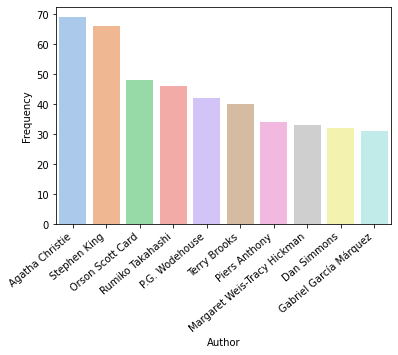

In [18]:
authorplot = sns.barplot(x = 'index',y='authors', data=mostcounts, palette="pastel")
authorplot.set_xticklabels(authorplot.get_xticklabels(), rotation=40, ha="right")
authorplot.set(xlabel='Author', ylabel='Frequency')
plt.show()

### What are the highest rated books?

In [19]:
# Do with groupby?

highest_rated_all = books.sort_values('average_rating', ascending=False)[:15]
highest_rated_books = highest_rated_all[['title', 'authors', 'average_rating', 'ratings_count', 'text_reviews_count']]
highest_rated_books


,title,authors,average_rating,ratings_count,text_reviews_count
6077,The Complete Theory Fun Factory: Music Theory Puzzles and Games for the Early Grades,Ian Martin-Katie Elliott,5.00,1,0
4939,Zone of the Enders: The 2nd Runner Official Strategy Guide,Tim Bogenn,5.00,2,0
963,Literature Circle Guide: Bridge to Terabithia: Everything You Need For Successful Literature Circles That Get Kids Thinking Talking Writing—and Loving Literature,Tara MacCarthy,5.00,4,1
7506,The New Big Book of America,Todd Davis-Marc Frey,5.00,2,1
11067,Bubbles in the Middle (The Powerpuff Girls Plus You Club #16),Aaron Rosenberg-Christopher Cook,5.00,5,0
13050,Ecuador Nature Guide: Southwest Forests: Sozoranga Forest Project,Chris Jiggins-Pablo Andrade-Eduardo Cueva,5.00,1,0
879,Willem de Kooning: Late Paintings,Julie Sylvester-David Sylvester,5.00,1,0
7434,Taxation of Mineral Rents,Ross Garnaut,5.00,1,0
11542,The Irish Anatomist: A Study of Flann O'Brien,Keith Donohue,5.00,1,0
8146,Delwau Duon: Peintiadau Nicholas Evans = Symphonies in Black: The Paintings of Nicholas Evans,Nicholas Evans-Rhonda Evans,5.00,1,0


The above cell showed an important detail, that not all entries have the same amount of reviews

Let's see what the highest rated books with at least 100 reviews are

In [20]:
highest_with_hundred = highest_rated_all[highest_rated_all['ratings_count'] >= 100][:10]
highest_with_hundred = highest_with_hundred[['title', 'authors', 'average_rating', 'ratings_count']]

fave_cols = highest_with_hundred[['title', 'average_rating']]

highest_with_hundred

,title,authors,average_rating,ratings_count


**The world really likes Calvin and Hobbes**

In [21]:
"""
favebookplot = sns.barplot(x = 'title',y='average_rating', data=fave_cols, palette="pastel")
favebookplot.set_xticklabels(favebookplot.get_xticklabels(), rotation=40, ha="right")
favebookplot.set(xlabel='Book', ylabel='Rating')
plt.show()
"""

'\nfavebookplot = sns.barplot(x = \'title\',y=\'average_rating\', data=fave_cols, palette="pastel")\nfavebookplot.set_xticklabels(favebookplot.get_xticklabels(), rotation=40, ha="right")\nfavebookplot.set(xlabel=\'Book\', ylabel=\'Rating\')\nplt.show()\n'

### What are the highest budget movies?

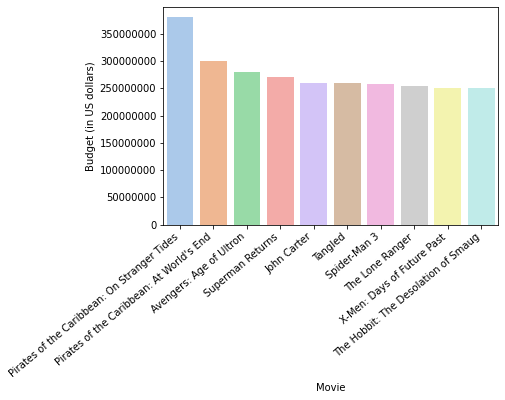

In [22]:
most_expensive_df = movies.sort_values('budget',ascending=False)[:10]

most_expensive = most_expensive_df[['title', 'budget', 'revenue']]

expensiveplot = sns.barplot(x = 'title',y='budget', data=most_expensive, palette="pastel")
expensiveplot.set_xticklabels(expensiveplot.get_xticklabels(), rotation=40, ha="right")
expensiveplot.set(xlabel='Movie', ylabel='Budget (in US dollars)')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [23]:
most_expensive

,title,budget,revenue
17,Pirates of the Caribbean: On Stranger Tides,380000000,1045713802
1,Pirates of the Caribbean: At World's End,300000000,961000000
7,Avengers: Age of Ultron,280000000,1405403694
10,Superman Returns,270000000,391081192
4,John Carter,260000000,284139100
6,Tangled,260000000,591794936
5,Spider-Man 3,258000000,890871626
13,The Lone Ranger,255000000,89289910
46,X-Men: Days of Future Past,250000000,747862775
22,The Hobbit: The Desolation of Smaug,250000000,958400000


### What are the most popular movies?

Using the TMDB popularity metric, which is not clearly defined anywhere. 

Per the TMDB documentation [here](https://developers.themoviedb.org/3/getting-started/popularity), it is some combination of:


Number of votes for the day

Number of views for the day

Number of users who marked it as a "favourite" for the day

Number of users who added it to their "watchlist" for the day

Release date

Number of total votes

Previous days score

In [24]:
most_popular_df = movies.sort_values('popularity',ascending=False)[:10]
most_popular = most_popular_df[['title', 'popularity', 'release_date']]
most_popular

,title,popularity,release_date
546,Minions,875.58,2015-06-17
95,Interstellar,724.25,2014-11-05
788,Deadpool,514.57,2016-02-09
94,Guardians of the Galaxy,481.10,2014-07-30
127,Mad Max: Fury Road,434.28,2015-05-13
28,Jurassic World,418.71,2015-06-09
199,Pirates of the Caribbean: The Curse of the Black Pearl,271.97,2003-07-09
82,Dawn of the Planet of the Apes,243.79,2014-06-26
200,The Hunger Games: Mockingjay - Part 1,206.23,2014-11-18
88,Big Hero 6,203.73,2014-10-24


# Transformations and merging

## Partial String Matching

#### **find_matches()**

This function makes use of the fuzzywuzzy library to do partial string matching, and returns all strings at least xx% the same as the input string

In [25]:
def find_matches(df, column, string_to_match, min_ratio):
    # get a list of unique strings
    strings = df[column].unique()
    
    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
    #print('matches', matches)

    # only get matches with a ratio > min_ratio
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]
    #print('close_matches',close_matches)
    return close_matches





In [26]:
books_slice = books[0:3000].copy()
movie_slice = movies[0:3000].copy()

Generator below enumerates through all titles to find possible matches. This brute force approach takes ~ minutes for the full datasets.

In [27]:

matches_dict = {}
# smaller_book_section works
for i in books['title']:
  tmp = find_matches(movies, column='title', string_to_match=str(i),min_ratio=70)
  if tmp != []:
    matches_dict[i] = tmp

    
# takes ~11 minutes

same_names = pd.DataFrame.from_dict(matches_dict, orient='index')
same_names = same_names.reset_index()
same_names = same_names[['index',0]]
same_names.columns = ['Book', 'Movie']

# Same names shows all of the book/movie title matches at an 80% threshold
#same_names

 

Previously we observed that there is a high likelyhood for one word titles to match, but not be the same thing. We do a second pass over one word titles, requiring a higher level of similarity to accept them as the same.

In [33]:

one_word_titles = same_names[same_names['Book'].str.split().str.len() == 1]
one_word_dict = {}
for i in one_word_titles['Book']:
  tmp = find_matches(one_word_titles, column='Movie', string_to_match=str(i),min_ratio=95)
  if tmp != []:
    one_word_dict[i] = tmp

# one_word_dict shows all one word title book/movie matches at a 90% threshold
one_word_dict
one_word_df = pd.DataFrame.from_dict(one_word_dict, orient='index')
one_word_df = one_word_df.reset_index()
one_word_df


one_word_df.columns = ['Book', 'Movie']
#one_word_df


In [34]:
# grab more than one word titles
same_names_no_ones = same_names[same_names['Book'].str.split().str.len() > 1]

# combine highly likely one-word titles and more than one word titles
same_names_final = pd.concat([same_names_no_ones, one_word_df],sort=True).reset_index(drop=True)


# *********
# Final title matched dataframe
#same_names_final



In [35]:
same_names_final = same_names_final.reset_index()


Our same_names_final dataframe contains our partially string matched titles. If we want to do a pandas merge, they still will not merge with the same title. The easiest way to fix this is to simply set one of the titles to the other, so they are consistent

In [36]:
#same_names_final
for i in same_names_final['Book']:
  movie = same_names_final[same_names_final['Book'] == i]['Movie'].iloc[0]

  books.loc[books['title'] == i, 'title'] = movie
  same_names_final.loc[same_names_final['Movie']== movie, 'Book'] = movie


In [37]:
book_to_list = same_names_final['Book'].tolist()
movie_to_list = same_names_final['Movie'].tolist()

get_matched_books = books[books['title'].isin(book_to_list)]
get_matched_movies = movies[movies['title'].isin(movie_to_list)]





In [38]:
# potentially unnecessary sorting step
get_matched_movies.sort_values(by='title')
get_matched_books.sort_values(by='title')
;

''

### Merge String-matched Titles

In [39]:
df = pd.merge(get_matched_books,get_matched_movies)



In [40]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1767 entries, 0 to 1766
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 1767 non-null   object 
 1   authors               1767 non-null   object 
 2   average_rating        1767 non-null   float64
 3   # num_pages           1767 non-null   int64  
 4   ratings_count         1767 non-null   int64  
 5   text_reviews_count    1767 non-null   int64  
 6   budget                1767 non-null   int64  
 7   keywords              1767 non-null   object 
 8   original_title        1767 non-null   object 
 9   overview              1767 non-null   object 
 10  popularity            1767 non-null   float64
 11  production_companies  1767 non-null   object 
 12  release_date          1767 non-null   object 
 13  revenue               1767 non-null   int64  
 14  runtime               1767 non-null   float64
 15  spoken_languages     

In [41]:
df.head(5)

,title,authors,average_rating,# num_pages,ratings_count,text_reviews_count,budget,keywords,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
0,Harry Potter and the Half-Blood Prince,J.K. Rowling-Mary GrandPré,4.56,652,1944099,26249,250000000,"[{""id"": 616, ""name"": ""witch""}, {""id"": 2343, ""name"": ""magic""}, {""id"": 3872, ""name"": ""broom""}, {""id"": 3884, ""name"": ""school of witchcraft""}, {""id"": 6333, ""name"": ""wizardry""}, {""id"": 10164, ""name"": ""apparition""}, {""id"": 10791, ""name"": ""teenage crush""}, {""id"": 12564, ""name"": ""werewolf""}]",Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he discovers an old book marked as 'Property of the Half-Blood Prince', and begins to learn more about Lord Voldemort's dark past.",98.89,"[{""name"": ""Warner Bros."", ""id"": 6194}, {""name"": ""Heyday Films"", ""id"": 7364}]",2009-07-07,933959197,153.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Dark Secrets Revealed,7.40,5293
1,Harry Potter and the Half-Blood Prince,J.K. Rowling,4.56,768,1173,72,250000000,"[{""id"": 616, ""name"": ""witch""}, {""id"": 2343, ""name"": ""magic""}, {""id"": 3872, ""name"": ""broom""}, {""id"": 3884, ""name"": ""school of witchcraft""}, {""id"": 6333, ""name"": ""wizardry""}, {""id"": 10164, ""name"": ""apparition""}, {""id"": 10791, ""name"": ""teenage crush""}, {""id"": 12564, ""name"": ""werewolf""}]",Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he discovers an old book marked as 'Property of the Half-Blood Prince', and begins to learn more about Lord Voldemort's dark past.",98.89,"[{""name"": ""Warner Bros."", ""id"": 6194}, {""name"": ""Heyday Films"", ""id"": 7364}]",2009-07-07,933959197,153.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Dark Secrets Revealed,7.40,5293
2,Harry Potter and the Order of the Phoenix,J.K. Rowling-Mary GrandPré,4.49,870,1996446,27613,150000000,"[{""id"": 530, ""name"": ""prophecy""}, {""id"": 616, ""name"": ""witch""}, {""id"": 1014, ""name"": ""loss of lover""}, {""id"": 2343, ""name"": ""magic""}, {""id"": 2630, ""name"": ""cutting the cord""}, {""id"": 3650, ""name"": ""child hero""}, {""id"": 3737, ""name"": ""dying and death""}, {""id"": 3872, ""name"": ""broom""}, {""id"": 3873, ""name"": ""sorcerer's apprentice""}, {""id"": 3884, ""name"": ""school of witchcraft""}, {""id"": 4252, ""name"": ""black magic""}, {""id"": 4959, ""name"": ""death of a friend""}, {""id"": 5147, ""name"": ""sorcery""}, {""id"": 221387, ""name"": ""occultism""}]",Harry Potter and the Order of the Phoenix,"Returning for his fifth year of study at Hogwarts, Harry is stunned to find that his warnings about the return of Lord Voldemort have been ignored. Left with no choice, Harry takes matters into his own hands, training a small group of students – dubbed 'Dumbledore's Army' – to defend themselves against the dark arts.",78.14,"[{""name"": ""Warner Bros."", ""id"": 6194}, {""name"": ""Heyday Films"", ""id"": 7364}]",2007-06-28,938212738,138.00,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Evil Must Be Confronted.,7.40,5494
3,Harry Potter and the Philosopher's Stone,J.K. Rowling-Mary GrandPré,4.47,320,5629932,70390,125000000,"[{""id"": 616, ""name"": ""witch""}, {""id"": 1441, ""name"": ""christmas party""}, {""id"": 2343, ""name"": ""magic""}, {""id"": 2630, ""name"": ""cutting the cord""}, {""id"": 3335, ""name"": ""halloween""}, {""id"": 3650, ""name"": ""child hero""}, {""id"": 3872, ""name"": ""broom""}, {""id"": 4238, ""name"": ""chosen one""}, {""id"": 4456, ""name"": ""frog""}, {""id"": 170362, ""name"": ""fantasy world""}, {""id"": 223438, ""name"": ""based on young adult novel""}]",Harry Potter and the Philosopher's Stone,"Harry Potter has lived under the stairs at his aunt and uncle's house his whole life. But on his 11th birthday, he learns he's a 

'authors' column includes foreward writers, translators etc. The first entry is always the actual author, so grab that and make an 'author' column.

In [42]:
grab = df['authors'].str.split('-')
grab = grab.apply(lambda x: x[0])
df['author'] = grab


### Merge Credits

The TMDB dataset includes addtional information on a movies cast and cres in a dataset called 'credits'. We will use it in the verify function below

In [43]:
df = pd.merge(df, credits)

### Drop duplicates

In [44]:
grab_duplicates = df.sort_values('ratings_count', ascending=False).duplicated(['title'], keep = 'first')


In [45]:
df = df.drop(df[grab_duplicates].index)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1231 entries, 0 to 1772
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 1231 non-null   object 
 1   authors               1231 non-null   object 
 2   average_rating        1231 non-null   float64
 3   # num_pages           1231 non-null   int64  
 4   ratings_count         1231 non-null   int64  
 5   text_reviews_count    1231 non-null   int64  
 6   budget                1231 non-null   int64  
 7   keywords              1231 non-null   object 
 8   original_title        1231 non-null   object 
 9   overview              1231 non-null   object 
 10  popularity            1231 non-null   float64
 11  production_companies  1231 non-null   object 
 12  release_date          1231 non-null   object 
 13  revenue               1231 non-null   int64  
 14  runtime               1231 non-null   float64
 15  spoken_languages     

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


### Verify


Steps:
*   Does movie mention book author?
*   Look for 'based on novel' type phrase in movie: keywords, genre, credits
*   Look for reference to book in overview




Verify step 1: Does movie mention book author?

In [46]:
for i in df['title']:
  author = df[df['title'] == i]['author']
  author = author.iloc[0]
  get = df[df['title'] == i]['crew'].str.contains(f'{author}').iloc[0]
  #print(f'"{author}""')
  df.loc[df['title'] == i, 'Mentions Author'] = get



Verify step 2: Explicitly says based on novel

In [47]:
for i in df['title']:
  keyword = df[df['title'] == i]['keywords'].str.lower()
  value = keyword.str.contains('novel')
  df.loc[df['title'] == i, 'Based on Novel'] = value



Verify step 3: Look in overview for 'novel, book, authobiography'

In [ ]:
for i in df['title']:
  overview = df[df['title'] == i]['overview'].str.lower()
  author = df[df['title'] == i]['author'].str.lower()

  novel = overview.str.contains('novel')
  book = overview.str.contains('book')
  best_selling = overview.str.contains('best selling')
  potter = overview.str.contains('potter')
  mentions_author = overview.str.contains(str(author))
  contains_one = novel | book | best_selling | mentions_author | potter
  df.loc[df['title'] == i, 'Overview mentions book'] = contains_one



In [ ]:
def verify(df):
  df['Verify'] = df['Mentions Author'] | df['Based on Novel'] | df['Overview mentions book']



In [ ]:
verify(df)

unverified = df[df['Verify'] == False]
df = df[df['Verify'] == True]


In [ ]:
unverified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 905 entries, 20 to 1772
Data columns (total 28 columns):
title                     905 non-null object
authors                   905 non-null object
average_rating            905 non-null float64
# num_pages               905 non-null int64
ratings_count             905 non-null int64
text_reviews_count        905 non-null int64
budget                    905 non-null int64
keywords                  905 non-null object
original_title            905 non-null object
overview                  905 non-null object
popularity                905 non-null float64
production_companies      905 non-null object
release_date              905 non-null object
revenue                   905 non-null int64
runtime                   905 non-null float64
spoken_languages          905 non-null object
status                    905 non-null object
tagline                   768 non-null object
vote_average              905 non-null float64
vote_count          

# Merged Set 



In [ ]:
df = df.rename(columns={'average_rating': 'book_rating', 'vote_average': 'movie_rating'})


Utility function for saving df to drive

In [ ]:
def save_df(df):
  dataframe_csv = df.to_csv()
  with open("/content/drive/My Drive/data/Dataframe.csv", 'w') as f:
    f.write(dataframe_csv)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326 entries, 0 to 1766
Data columns (total 28 columns):
title                     326 non-null object
authors                   326 non-null object
book_rating               326 non-null float64
# num_pages               326 non-null int64
ratings_count             326 non-null int64
text_reviews_count        326 non-null int64
budget                    326 non-null int64
keywords                  326 non-null object
original_title            326 non-null object
overview                  326 non-null object
popularity                326 non-null float64
production_companies      326 non-null object
release_date              326 non-null object
revenue                   326 non-null int64
runtime                   326 non-null float64
spoken_languages          326 non-null object
status                    326 non-null object
tagline                   281 non-null object
movie_rating              326 non-null float64
vote_count           

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
book_rating,326.00,3.94,0.25,2.86,3.80,3.96,4.10,4.56
# num_pages,326.00,333.96,202.64,1.00,211.00,303.50,418.25,1463.00
ratings_count,326.00,177326.98,457442.85,2.00,1392.25,15072.00,159474.75,5629932.00
text_reviews_count,326.00,4153.71,9674.73,0.00,94.00,848.50,3472.25,84237.00
budget,326.00,40125102.94,45849453.26,0.00,7050000.00,25000000.00,60000000.00,250000000.00
popularity,326.00,30.04,29.44,0.02,9.37,21.10,42.57,167.93
revenue,326.00,132691983.58,212837541.87,0.00,9355599.00,49848044.50,150765877.25,1118888979.00
runtime,326.00,118.99,24.85,75.00,101.00,115.00,131.00,242.00
movie_rating,326.00,6.61,0.80,4.40,6.10,6.70,7.20,8.40
vote_count,326.00,1128.04,1667.59,1.00,130.25,482.50,1291.25,9413.00


In [ ]:
df['title'].unique()

array(['Harry Potter and the Half-Blood Prince',
       'Harry Potter and the Order of the Phoenix',
       "Harry Potter and the Philosopher's Stone",
       'Harry Potter and the Chamber of Secrets',
       'Harry Potter and the Prisoner of Azkaban',
       "The Hitchhiker's Guide to the Galaxy",
       'The Lord of the Rings: The Fellowship of the Ring',
       'The Lord of the Rings: The Two Towers',
       'The Count of Monte Cristo',
       "What to Expect When You're Expecting", 'Anna Karenina',
       'Treasure Planet', 'The Wedding Date', 'The Namesake',
       'Paper Towns', 'The Lovely Bones', 'Atlas Shrugged Part II',
       'The Living Wake', 'The Big Year', 'The Kite Runner',
       'Memoirs of a Geisha', 'Angels & Demons', 'The Da Vinci Code',
       'Snow Flower and the Secret Fan', 'Life of Pi',
       'The Clan of the Cave Bear', 'Warm Bodies', 'The Great Raid',
       'The Princess and the Frog', 'Hamlet', 'Veronika Decides to Die',
       'Brokeback Mountain', 'The 

We have the books which have movies, grab those that don't, store in datafraem called just_books

In [ ]:
just_books = books[~books['title'].isin(df['title'])]
just_movies = movies[~movies['title'].isin(df['title'])]
books['Made into movie'] = books['title'].isin(df['title'])

In [ ]:
just_books = just_books.rename(columns={'average_rating': 'book_rating'})

just_books.describe()
df.describe()

,book_rating,# num_pages,ratings_count,text_reviews_count,budget,popularity,revenue,runtime,movie_rating,vote_count,movie_id
count,326.00,326.00,326.00,326.00,326.00,326.00,326.00,326.00,326.00,326.00,326.00
mean,3.94,333.96,177326.98,4153.71,40125102.94,30.04,132691983.58,118.99,6.61,1128.04,32385.80
std,0.25,202.64,457442.85,9674.73,45849453.26,29.44,212837541.87,24.85,0.80,1667.59,61891.52
min,2.86,1.00,2.00,0.00,0.00,0.02,0.00,75.00,4.40,1.00,66.00
25%,3.80,211.00,1392.25,94.00,7050000.00,9.37,9355599.00,101.00,6.10,130.25,2168.25
50%,3.96,303.50,15072.00,848.50,25000000.00,21.10,49848044.50,115.00,6.70,482.50,10547.00
75%,4.10,418.25,159474.75,3472.25,60000000.00,42.57,150765877.25,131.00,7.20,1291.25,25916.75
max,4.56,1463.00,5629932.00,84237.00,250000000.00,167.93,1118888979.00,242.00,8.40,9413.00,339984.00


### Combined rating
Books on goodreads are rated out out of 5.

Movies are rated out of 10

In comparing a book+movie combination it would make sense to have a total rating that fairly weighs the two scores. For now I am multiplying the book rating by 2, adding it to the movie score, dividing the total by 2.

In [ ]:
df['Combined Rating'] = ((df['book_rating'] * 2)  + df['movie_rating']) / 2
print('Highest combined rating')
df.sort_values('Combined Rating', ascending=False)[:10][['title','Combined Rating']]

Highest combined rating


,title,Combined Rating
633,Howl's Moving Castle,8.61
1305,The Godfather,8.57
952,The Green Mile,8.54
19,The Lord of the Rings: The Two Towers,8.53
704,The Lord of the Rings: The Return of the King,8.51
11,The Lord of the Rings: The Fellowship of the Ring,8.49
7,Harry Potter and the Prisoner of Azkaban,8.40
589,Fight Club,8.35
771,Anne of Green Gables,8.34
1711,Harry Potter and the Goblet of Fire,8.30


In [ ]:
print('Lowest combined rating')
df.sort_values('Combined Rating', ascending=True)[:10][['title','Combined Rating']]

Lowest combined rating


,title,Combined Rating
842,The Informers,5.58
1252,Confessions of a Teenage Drama Queen,5.87
736,Gulliver's Travels,6.01
1488,The Island of Dr. Moreau,6.02
1082,Under the Rainbow,6.04
1034,Striptease,6.04
109,The Big Year,6.05
1608,Damnation Alley,6.07
729,Congo,6.08
389,The Extra Man,6.10


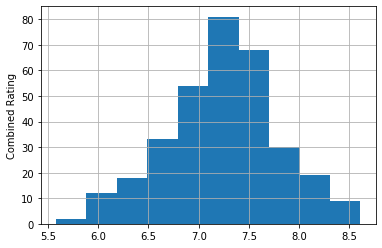

In [ ]:
df['Combined Rating'].hist()
plt.ylabel('Combined Rating')
plt.show()

In [ ]:
df.corr()['Combined Rating'].abs().sort_values(ascending=False)

Combined Rating          1.00
movie_rating             0.92
book_rating              0.76
popularity               0.49
vote_count               0.48
runtime                  0.41
revenue                  0.31
ratings_count            0.24
text_reviews_count       0.19
# num_pages              0.12
Mentions Author          0.09
budget                   0.07
Based on Novel           0.05
movie_id                 0.04
Overview mentions book   0.01
Verify                    nan
Name: Combined Rating, dtype: float64

In [ ]:
df.corr()['book_rating'].abs().sort_values(ascending=False)

book_rating              1.00
Combined Rating          0.76
movie_rating             0.44
popularity               0.32
vote_count               0.31
ratings_count            0.30
runtime                  0.29
revenue                  0.28
text_reviews_count       0.24
budget                   0.17
# num_pages              0.16
Based on Novel           0.10
Mentions Author          0.06
movie_id                 0.03
Overview mentions book   0.01
Verify                    nan
Name: book_rating, dtype: float64

In [ ]:
df.corr()['movie_rating'].abs().sort_values(ascending=False)

movie_rating             1.00
Combined Rating          0.92
popularity               0.48
vote_count               0.48
book_rating              0.44
runtime                  0.40
revenue                  0.26
ratings_count            0.14
text_reviews_count       0.11
Mentions Author          0.08
# num_pages              0.06
movie_id                 0.04
budget                   0.01
Overview mentions book   0.01
Based on Novel           0.00
Verify                    nan
Name: movie_rating, dtype: float64

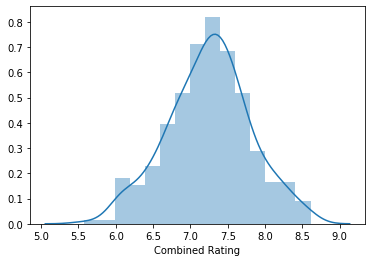

In [ ]:
sns.distplot(df['Combined Rating'])

## T-Tests

The assumption has been made that there is some relationship between good books and being made into a movie, or that good books predict good movies.

This section runs formal tests to see if the average means between books with movies and books without are significantly different.

### Is the average rating of books with a movie different than those without?

Two tailed, independent

Following this guide https://pythonfordatascience.org/independent-t-test-python/



In [ ]:
from scipy import stats


####Assumptions:

1. Equal variance
* Levene Test
* Bartlett Test

Normally distributed:
* Kind of

In [ ]:
# levene's test for homogenity of variance
stats.levene(df['book_rating'], just_books['book_rating'])

LeveneResult(statistic=9.78319496438978, pvalue=0.0017648998990131596)

In [ ]:
stats.bartlett(df['book_rating'], just_books['book_rating'])

BartlettResult(statistic=71.33512807939051, pvalue=3.014212917754956e-17)

Tiny p-value, we reject the null hypothesis of equal variance. Conclude that our samples have different variance.



(3.929766803840863, <matplotlib.axes._subplots.AxesSubplot at 0x7fb81c66dcc0>)

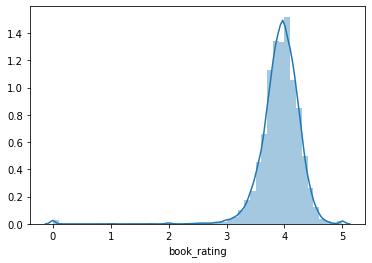

In [ ]:
just_books['book_rating'].mean(), sns.distplot(just_books['book_rating'])

(3.9433435582822094, <matplotlib.axes._subplots.AxesSubplot at 0x7fb81c632668>)

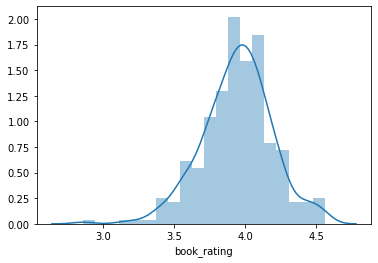

In [ ]:
df['book_rating'].mean(), sns.distplot(df['book_rating'])

In [ ]:
diff = df['book_rating'] - just_books['book_rating']

((array([-3.87786126, -3.65639293, -3.53497198, ...,  3.53497198,
          3.65639293,  3.87786126]),
  array([-1.15, -1.08, -0.94, ...,   nan,   nan,   nan])),
 (nan, nan, nan))

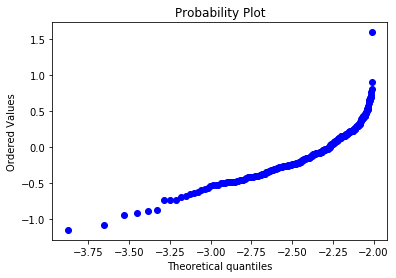

In [ ]:
stats.probplot(diff, plot= plt)


Welch's T-test may work for unequal variance

In [ ]:
stats.ttest_ind(df['book_rating'], just_books['book_rating'], equal_var=False)

Ttest_indResult(statistic=0.9611519252322183, pvalue=0.33712069660557586)

The test returned a pvalue of 0.337. At a 5% confidence interval we can not reject the null hypothesis, which says there is no difference between the true averages of the groups. We conclude the average ratings between books which are made into movies, and those which are not, is NOT significantly different. 

### Is the average rating of movies based on books different than those that are not?

In [ ]:
stats.levene(df['movie_rating'], just_movies['vote_average'])

LeveneResult(statistic=12.390661931877023, pvalue=0.0004354919343715371)

Tiny p-value, we reject the null hypothesis of equal variance. Conclude that our samples have different variance.


(6.054535299374435, <matplotlib.axes._subplots.AxesSubplot at 0x7fb81c45dcf8>)

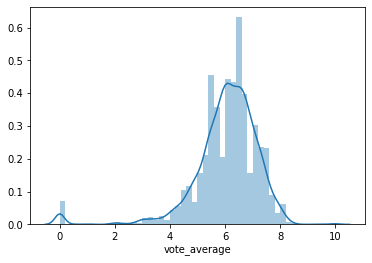

In [ ]:
just_movies['vote_average'].mean(), sns.distplot(just_movies['vote_average'])

(6.607055214723931, <matplotlib.axes._subplots.AxesSubplot at 0x7fb81c3bdf60>)

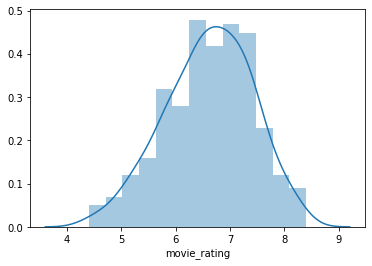

In [ ]:
df['movie_rating'].mean(), sns.distplot(df['movie_rating'])

In [ ]:
stats.ttest_ind(df['movie_rating'], just_movies['vote_average'], equal_var=False)

Ttest_indResult(statistic=11.521324340526398, pvalue=4.9811969757445784e-27)

The test returned a pvalue of 4.981. At a 5% confidence level, we can not reject the null hypothesis, which says there is no difference between the true averages of the groups. We conclude the average ratings between movies which are based on books and those which are not is NOT significantly different.

## Models

### Can we use linear regression to predict what a book's movie rating would be?

Say I worked at a production company, and was interested in possibly making a movie out of a book. Linear regression is a statistical tool for predicting a continuous outcome (dependent variable) given one or more predictors (independent variables). We are looking to predict **movie_rating** based on **book_rating, ratings_count, number of pages, and text_reviews_count**. 

In [ ]:
df.corr()['movie_rating'].abs().sort_values(ascending=False)

movie_rating             1.00
Combined Rating          0.92
popularity               0.48
vote_count               0.48
book_rating              0.44
runtime                  0.40
revenue                  0.26
ratings_count            0.14
text_reviews_count       0.11
Mentions Author          0.08
# num_pages              0.06
movie_id                 0.04
budget                   0.01
Overview mentions book   0.01
Based on Novel           0.00
Verify                    nan
Name: movie_rating, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# to predict combined rating
features = df[['book_rating', 'ratings_count', '# num_pages', 'text_reviews_count']].values.reshape(-1,4)
outcome = df['movie_rating'].values.reshape(-1,1)

Here I set aside 20% of the data for testing accuracy, and 80% for training the model.

In [ ]:
from sklearn.model_selection import train_test_split 
# 80% of data train, 20% to test
X_train, X_test, y_train, y_test = train_test_split(features, outcome, test_size=0.2, random_state=0)

movie_rating_regression = LinearRegression().fit(X_train, y_train)

print('intercept', movie_rating_regression.intercept_)
print('coefficient', movie_rating_regression.coef_)


intercept [1.00465962]
coefficient [[ 1.40231249e+00  4.92959618e-08  8.52395772e-05 -7.23584793e-07]]


Seen above, our regression line has the equation:

movie_rating = 1.005 + 1.40book_rating + 4.63e-08ratings_count + 8.52e-05#num_pages + -7,24e-07text_reviews_count.


How do the models predictions compare to the actual values?

In [ ]:
y_pred = movie_rating_regression.predict(X_test)

regression_test = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
regression_test

,Actual,Predicted
0,7.40,6.50
1,6.30,6.23
2,6.40,6.20
3,7.60,6.67
4,6.20,6.32
...,...,...
61,6.90,6.83
62,6.40,6.11
63,6.40,6.47
64,5.90,6.26


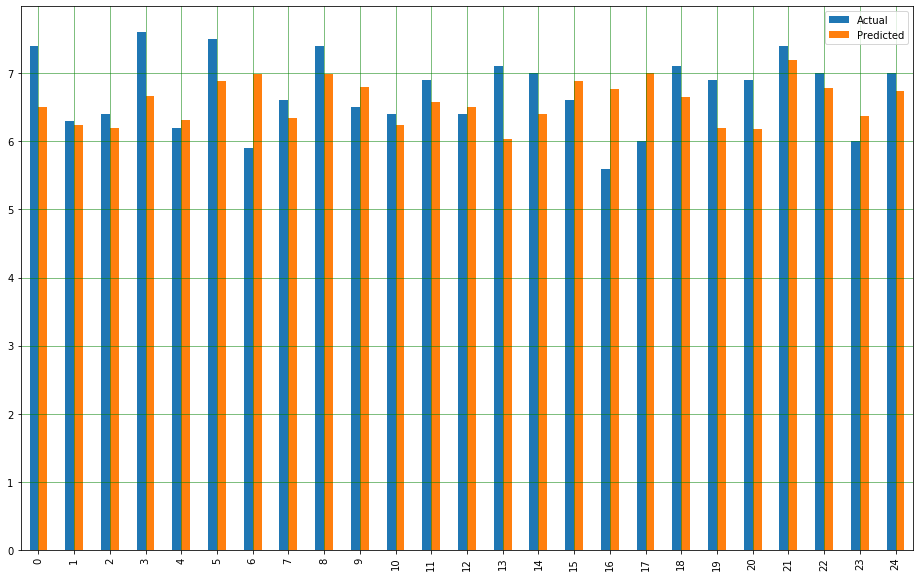

In [ ]:
regression_test_plot = regression_test.head(25)
regression_test_plot.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

The regression line plotted against the data, shows a positive linear relationship.

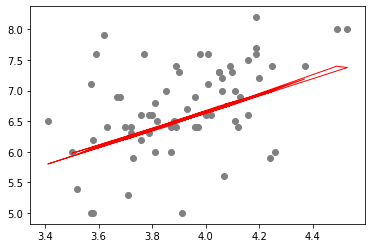

In [ ]:
plt.scatter(X_test[:,0], y_test,  color='gray')
plt.plot(X_test[:,0], y_pred, color='red', linewidth=1)
plt.show()

The predictors account for 19% of the variability in movie rating.

In [ ]:
print("This model's r-squared is:", movie_rating_regression.score(features,outcome).round(2))

This model's r-squared is: 0.19


Predict a book with: 3.5 rating, 500 ratings, 250 pages long, 100 text reviews

In [ ]:
movie_rating_regression.predict([[3.5, 500, 250, 50]])

array([[5.93405172]])

In [ ]:
df[(df['book_rating'] > 3.5) & (df['book_rating'] < 3.7)][['book_rating','ratings_count','text_reviews_count', '# num_pages', 'movie_rating']]

,book_rating,ratings_count,text_reviews_count,# num_pages,movie_rating
59,3.58,89,11,256,6.20
93,3.68,311883,14267,1168,5.40
207,3.60,9956,858,259,5.90
293,3.63,7407,515,293,5.50
304,3.51,4182,604,261,6.60
345,3.66,633,45,248,7.30
391,3.57,18175,631,233,7.10
400,3.60,11597,519,230,6.30
403,3.63,16198,916,229,6.40
418,3.59,5835,447,371,5.20


### Can we use Logistic regression to categorize books as likely/not likely to be made into a movie?

The books have been split into a binary categorization of Made into a movie, 1, or not Made into a movie 0. Given a book of unknown categorization, I would like to make a model which could predict which it will fall into. One technique to do this is to use logistic regression.

I followed standard techniques which I found [here](https://www.geeksforgeeks.org/ml-logistic-regression-using-python/) and [here](https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python). 

** Revised
Pick random sample of 300 non-movie books, try again

In [ ]:
log_book_slice = books[books['Made into movie'] == 0][:300]
#log_book_slice

,title,authors,average_rating,# num_pages,ratings_count,text_reviews_count,Made into movie
5,Harry Potter Boxed Set Books 1-5 (Harry Potter #1-5),J.K. Rowling-Mary GrandPré,4.78,2690,38872,154,0
6,"Unauthorized Harry Potter Book Seven News: ""Half-Blood Prince"" Analysis and Speculation",W. Frederick Zimmerman,3.69,152,18,1,0
7,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,3342,27410,820,0
8,The Ultimate Hitchhiker's Guide: Five Complete Novels and One Story (Hitchhiker's Guide to the Galaxy #1-5),Douglas Adams,4.38,815,3602,258,0
10,The Hitchhiker's Guide to the Galaxy (Hitchhiker's Guide to the Galaxy #1),Douglas Adams,4.22,215,4416,408,0
...,...,...,...,...,...,...,...
327,The Westing Game,Ellen Raskin,4.02,182,134362,8278,0
328,The Egyptian,Zilpha Keatley Snyder,3.82,215,29160,1083,0
332,Memoirs of a Geisha: A Portrait of the Film,David James-Peggy Mulloy-Rob Marshall-Arthur Golden,4.08,144,142,8,0
334,Geisha of Gion,Mineko Iwasaki-Rande Brown,3.93,334,1438,148,0


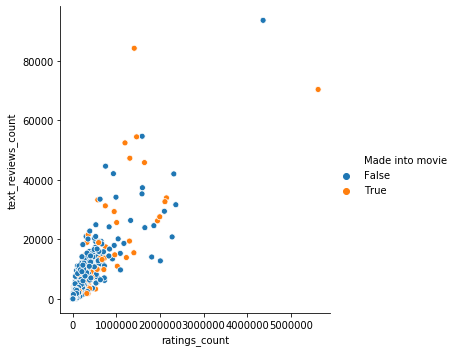

In [ ]:
sns.relplot(x='ratings_count', y='text_reviews_count', hue = 'Made into movie', data = books)

In [ ]:
books.corr()['Made into movie'].abs().sort_values(ascending=False)

Made into movie      1.00
text_reviews_count   0.15
ratings_count        0.15
average_rating       0.01
# num_pages          0.00
Name: Made into movie, dtype: float64

In [ ]:
books['Made into movie'] = books['Made into movie'].map({True: 1, False: 0})


The **average_rating**, **text_reviews_count** and **ratings_count** attributes will be the predictors (independent variables) for **Made into Movie**.

In [ ]:
logfeatures = books[['average_rating', 'ratings_count', 'text_reviews_count']].values.reshape(-1,3)

logoutcomes = books['Made into movie'].values.reshape(-1,1)

25% of the data is set aside for testing, the rest is used to train the model.

In [ ]:
from sklearn.model_selection import train_test_split
log_xtrain, log_xtest, log_ytrain, log_ytest = train_test_split( 
        logfeatures, logoutcomes, test_size = 0.25, random_state = 0) 

Our predictors are on different scales. Average_rating will never be more than 5, but ratings_count and text_reviews_count will be in the hundreds or thousands. We scale these values so that they have the same amount of impact on the model.

In [ ]:

from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 
log_xtrain = sc_x.fit_transform(log_xtrain)  
log_xtest = sc_x.transform(log_xtest) 

#print(xtrain[0:10, :])


In [ ]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0) 
classifier.fit(log_xtrain, log_ytrain) 
log_y_pred = classifier.predict(log_xtest) 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
log_cm = confusion_matrix(log_ytest, log_y_pred) 
  
print ("Confusion Matrix : \n", log_cm)
print ("Accuracy : ", accuracy_score(log_ytest, log_y_pred))

Confusion Matrix : 
 [[3284    3]
 [ 141    1]]
Accuracy :  0.958005249343832


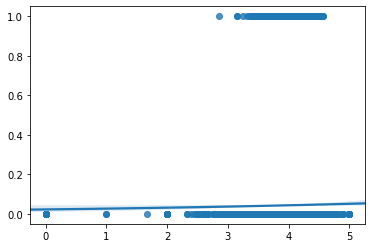

In [ ]:
sns.regplot(x=logfeatures[:,0], y=logoutcomes, data=books, logistic=True)


In [ ]:
classifier.predict_proba(log_xtest)

array([[0.95931006, 0.04068994],
       [0.95843134, 0.04156866],
       [0.96006293, 0.03993707],
       ...,
       [0.9613994 , 0.0386006 ],
       [0.96359781, 0.03640219],
       [0.95905004, 0.04094996]])

In [ ]:
classifier_test = pd.DataFrame({'Actual': log_ytest.flatten(), 'Predicted': log_y_pred.flatten()})
classifier_test[classifier_test['Actual'] ==1]

,Actual,Predicted
2,1,0
44,1,0
50,1,0
141,1,0
162,1,0
...,...,...
3211,1,0
3241,1,0
3269,1,0
3336,1,0


Conclusion

The model almost always predicts zero, predicting wrong almost every time the actual value is 1. This could be because most of the books are 0 (only 300/15000 are 1). It could be because the predictors are weakly correlated with the outcome.

## Interesting questions/visualizations

### What were the best books that made the worst movies?

In [ ]:
df['rating_difference'] = (df['book_rating'] * 2) - df['movie_rating']
df['book_rating (normalized)'] = df['book_rating'] * 2
df.sort_values(by='rating_difference', ascending=False)[['title', 'book_rating (normalized)', 'movie_rating', 'rating_difference']][:10]

,title,book_rating (normalized),movie_rating,rating_difference
1087,The Bridge of San Luis Rey,8.86,5.40,3.46
1085,One for the Money,8.70,5.30,3.40
221,Pride and Prejudice and Zombies,8.86,5.50,3.36
138,The Clan of the Cave Bear,8.08,4.80,3.28
1034,Striptease,7.68,4.40,3.28
1755,Jekyll and Hyde ... Together Again,7.60,4.60,3.00
513,Breakfast of Champions,8.16,5.20,2.96
1757,The Musketeer,8.14,5.20,2.94
1633,The Big Bounce,7.90,5.00,2.90
1488,The Island of Dr. Moreau,7.44,4.60,2.84


### What movies were much better than the book?

In [ ]:
df.sort_values(by='rating_difference', ascending=True)[['title', 'book_rating (normalized)', 'movie_rating', 'rating_difference']][:10]

,title,book_rating (normalized),movie_rating,rating_difference
1520,Up in the Air,5.72,6.70,-0.98
1033,Gone Girl,7.24,7.90,-0.66
840,The Fault in Our Stars,7.18,7.60,-0.42
1048,The Prestige,7.76,8.00,-0.24
1355,The Notebook,7.52,7.70,-0.18
1666,The Martian,7.54,7.60,-0.06
345,The Revenant,7.32,7.30,0.02
475,The Raid,7.34,7.30,0.04
391,Stranger Than Fiction,7.14,7.10,0.04
270,Moby Dick,6.98,6.90,0.08


## Interface (in progress)

Say I wanted to know: 'I really like book X, I wonder if it's a movie? If not, I wonder if it will be, and how well it would do?'

This notebook has created the tools to potentially answer those questions, but not a means for accessing them. My final step will be to create an interface function which will:

Take in the title of a book as input:

*   Determine if it is in the dataset or not
*   If it is a movie, return information
*   If it is not a movie:
*   Use the logistic regression to determine it's likelihood of being made into a movie
*   Use the linear regression to predict its movie rating



In [ ]:
def interface(input_title):
  msg = ''
  look_df = df[df['title'] ==input_title][['title', 'author', 'book_rating', 'movie_rating', '# num_pages', 'text_reviews_count', 'ratings_count']]
  look_books = books[books['title'] == input_title][['title', 'authors', 'average_rating', 'ratings_count']]
  if look_books.empty:
    print('That book isn\'t in our dataset. Try another!')

  elif ~look_books.empty and look_df.empty:
    print('Match found! That book doesn\'t have a movie.')
    params = look_df[['book_rating', 'ratings_count','# num_pages', 'text_reviews_count']].values.reshape(-1,4)
    print(movie_rating_regression.predict([[params]]))

  elif ~look_books.empty and ~look_df.empty:
    print('Match found! That book already has a movie.')
    print(look_df)

#interface('In a Sunburned Country')

# Conclusion and Summary

This notebook achieved the following goals:


1.   Merged the Goodreads books and TMDB Movie datasets from Kaggle
2.   Identified a subset of things which are both books and movies, for use in future analysis
3.   Found that being made into a movie is not proof of a higher average rating for books or movies
4.   Used linear regression to predict a movie score from features of a book
5.   Used logistic regression to predict whether a book was likely to be made into a movie.


Improvements:

*   Make verification function more accurate. Right now it pretty solidly guarantees a pair is the same, but probably misses some.

*   Improve accuracy of classification, possibly use different model.
